<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/modelling/OB_test_api_metric_gathering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tests to generate a past volatility time series

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

In [2]:
#Gather stock data

tickers = ['SAN', 'JPM', 'UBS']

df = yf.download(tickers, start='2023-01-01', end='2023-12-31')

[*********************100%***********************]  3 of 3 completed


In [4]:
#Separate Close prices
san_df = df['Close']['SAN']
jpm_df = df['Close']['JPM']
ubs_df = df['Close']['UBS']

#Calculate daily returns
san_df_return = san_df.pct_change()
jpm_df_return = jpm_df.pct_change()
ubs_df_return = ubs_df.pct_change()

#Calculate rolling volatility (window = 30 days), annualise (252 trading days per year)
san_volatility = san_df_return.rolling(window=30).std() * (252**0.5)
jpm_volatility = jpm_df_return.rolling(window=30).std() * (252**0.5)
ubs_volatility = ubs_df_return.rolling(window=30).std() * (252**0.5)

#Calculate volatility change to use as target (Volatility Change = Current Volatility - Previous Volatility)
san_volatility_change = san_volatility.diff()
jpm_volatility_change = jpm_volatility.diff()
ubs_volatility_change = ubs_volatility.diff()

#Combine the data and drop NaNs
volatility_df = pd.DataFrame({
    'SAN_volatility': san_volatility,
    'JPM_volatility': jpm_volatility,
    'UBS_volatility': ubs_volatility,
    'SAN_volatility_change': san_volatility_change,
    'JPM_volatility_change': jpm_volatility_change,
    'UBS_volatility_change': ubs_volatility_change
}).dropna()

volatility_df

,SAN_volatility,JPM_volatility,UBS_volatility,SAN_volatility_change,JPM_volatility_change,UBS_volatility_change
Date,,,,,,
2023-02-16,0.283775,0.186939,0.144353,-0.016183,0.004591,-0.028714
2023-02-17,0.283622,0.186894,0.141421,-0.000153,-0.000044,-0.002931
2023-02-21,0.278185,0.188121,0.141796,-0.005437,0.001226,0.000375
2023-02-22,0.284909,0.189147,0.147685,0.006724,0.001027,0.005889
2023-02-23,0.285837,0.188794,0.145544,0.000929,-0.000353,-0.002141
...,...,...,...,...,...,...
2023-12-22,0.192241,0.113750,0.284048,0.000446,-0.001215,-0.005179
2023-12-26,0.186801,0.109917,0.283501,-0.005441,-0.003833,-0.000547
2023-12-27,0.186803,0.106492,0.273220,0.000002,-0.003425,-0.010281


In [5]:
#Combine the data and drop NaNs
volatility_df_2 = pd.DataFrame({
    'JPM_volatility': jpm_volatility,
    'UBS_volatility': ubs_volatility,
    'JPM_volatility_change': jpm_volatility_change,
    'UBS_volatility_change': ubs_volatility_change
}).dropna()

# Stock volatility plots.
* Annualized Volatility

Your rolling volatility calculation is annualized using a factor of (sqrt252) (assuming 252 trading days per year).
Example:

If SAN_volatility = 0.20, it means an expected annual standard deviation of 20% in returns.
If JPM_volatility = 0.35, it means an expected annual standard deviation of 35%, indicating JPM is more volatile than SAN.

* Volatility Change Interpretation

Positive Volatility Change: Increasing uncertainty, potentially due to news, earnings, or market events.
Negative Volatility Change: Market stabilizing, indicating reduced risk perception.

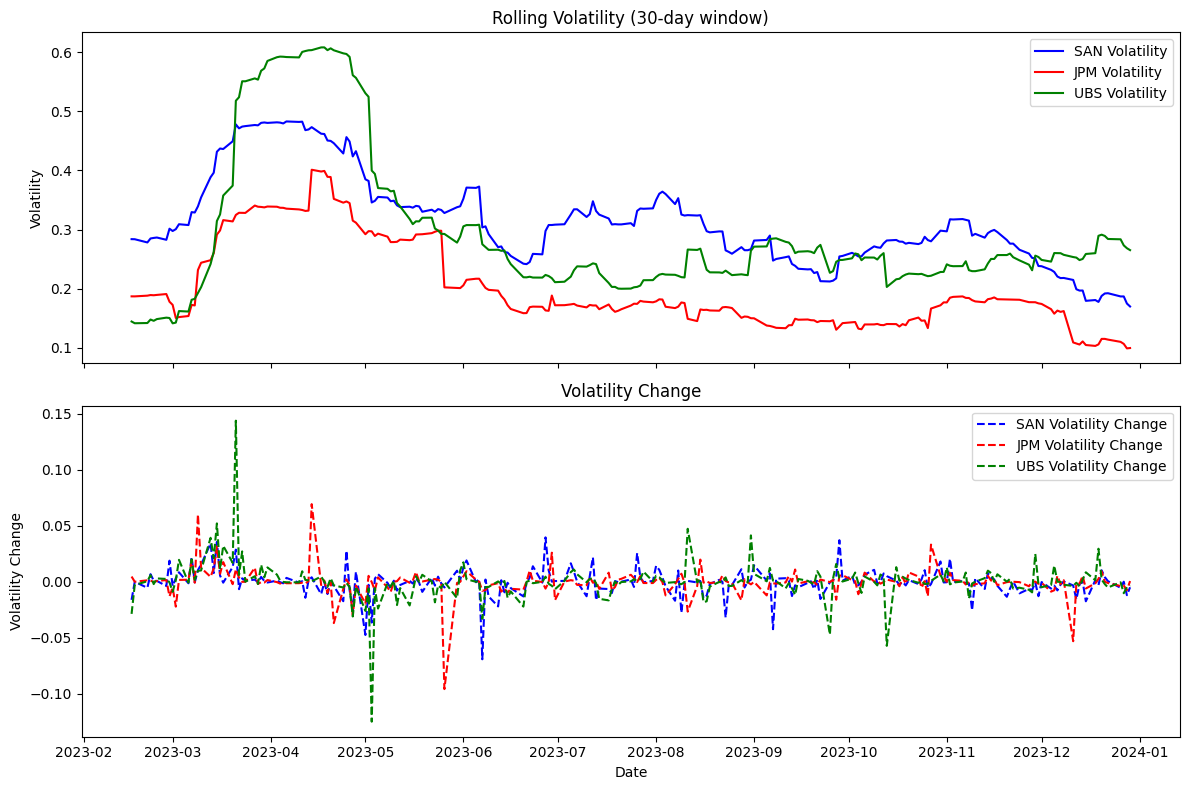

In [7]:
def plot_volatility(volatility_df):
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Plot rolling volatility
    axes[0].plot(volatility_df.index, volatility_df['SAN_volatility'], label='SAN Volatility', color='blue')
    axes[0].plot(volatility_df.index, volatility_df['JPM_volatility'], label='JPM Volatility', color='red')
    axes[0].plot(volatility_df.index, volatility_df['UBS_volatility'], label='UBS Volatility', color='green')
    axes[0].set_title('Rolling Volatility (30-day window)')
    axes[0].set_ylabel('Volatility')
    axes[0].legend()

    # Plot volatility change
    axes[1].plot(volatility_df.index, volatility_df['SAN_volatility_change'], label='SAN Volatility Change', color='blue', linestyle='dashed')
    axes[1].plot(volatility_df.index, volatility_df['JPM_volatility_change'], label='JPM Volatility Change', color='red', linestyle='dashed')
    axes[1].plot(volatility_df.index, volatility_df['UBS_volatility_change'], label='UBS Volatility Change', color='green', linestyle='dashed')
    axes[1].set_title('Volatility Change')
    axes[1].set_ylabel('Volatility Change')
    axes[1].set_xlabel('Date')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Call the function
plot_volatility(volatility_df)


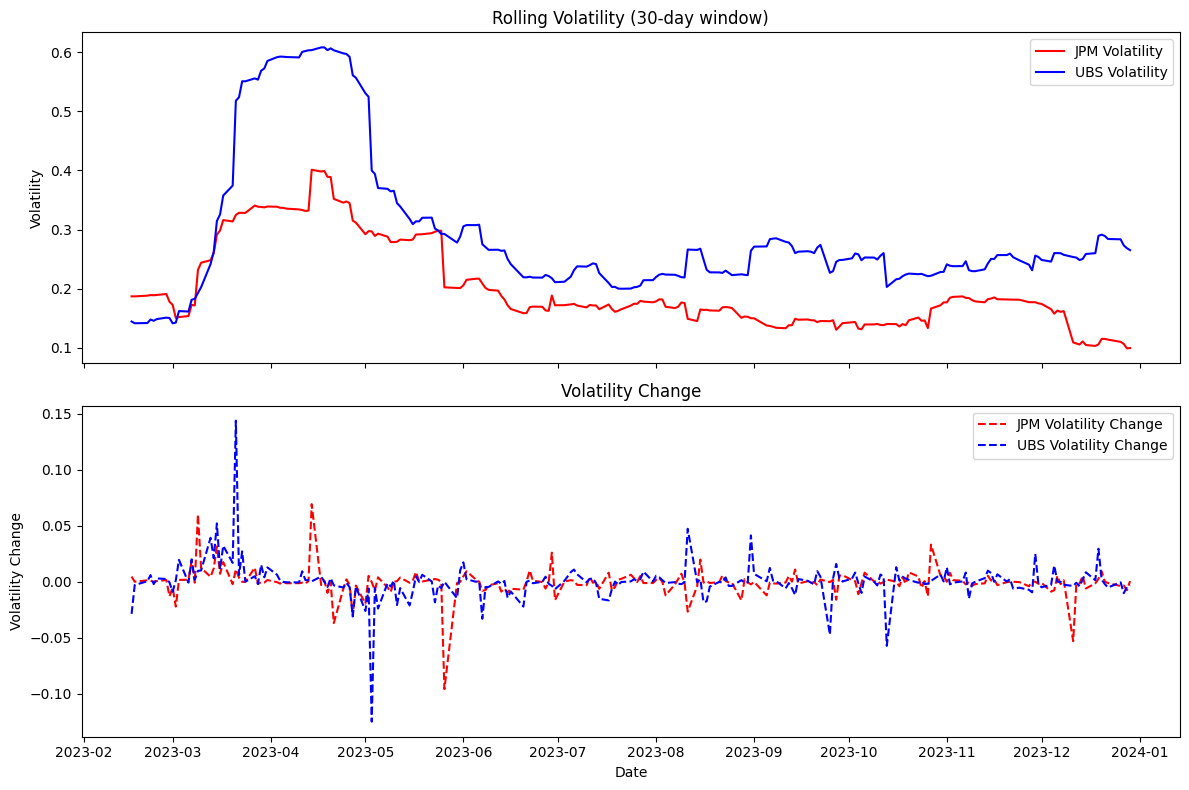

In [11]:
#Plot just JPM and UBS

def plot_volatility_2(volatility_df):
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Plot rolling volatility
    axes[0].plot(volatility_df.index, volatility_df['JPM_volatility'], label='JPM Volatility', color='red')
    axes[0].plot(volatility_df.index, volatility_df['UBS_volatility'], label='UBS Volatility', color='blue')
    axes[0].set_title('Rolling Volatility (30-day window)')
    axes[0].set_ylabel('Volatility')
    axes[0].legend()

    # Plot volatility change
    axes[1].plot(volatility_df.index, volatility_df['JPM_volatility_change'], label='JPM Volatility Change', color='red', linestyle='dashed')
    axes[1].plot(volatility_df.index, volatility_df['UBS_volatility_change'], label='UBS Volatility Change', color='blue', linestyle='dashed')
    axes[1].set_title('Volatility Change')
    axes[1].set_ylabel('Volatility Change')
    axes[1].set_xlabel('Date')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Call the function
plot_volatility_2(volatility_df_2)

In [ ]:
"""
#Feature engineering: lagged volatility
volatility_df['SAN_lagged_volatility'] = volatility_df['SAN_volatility_change'].shift(1)
volatility_df['JPM_lagged_volatility'] = volatility_df['JPM_volatility_change'].shift(1)

#Drop NaNs
volatility_df.dropna(inplace=True)

#Feature engineering: trade holiday Boolean


#Feature engineering: quarter

#Feature engineering: Month

#Show dataframe
volatility_df
"""

---
#Other Metrics

 * Loan Loss Provisions (LLP)

  Banks set aside reserves for potential loan defaults.
  Increased LLP = management expects higher credit risk.
  NLP Insight: Can the model detect rising risk sentiment in management discussions before LLP actually increases in the reports?

In [ ]:
ticker = 'JPM'

stock = yf.Ticker(ticker)

income_stmt = stock.financials

print(income_stmt.index)

Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Total Unusual Items', 'Total Unusual Items Excluding Goodwill',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Net Interest Income', 'Interest Expense',
       'Interest Income', 'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Diluted Average Shares', 'Basic Average Shares', 'Diluted EPS',
       'Basic EPS', 'Diluted NI Availto Com Stockholders',
       'Net Income Common Stockholders', 'Otherunder Preferred Stock Dividend',
       'Preferred Stock Dividends', 'Net Income',
       'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Special Income Charges', 'Other Special Charges',
       'Restructuring And Mergern Acquisition', 'Gain On Sale Of Security',
       'Selling General And Administration', 'Selling And Marketing Expense',
     

---
# NII:

* Net Interest Income - this is accesible via yf for JPM: 'Net Interest Income'

In [ ]:
# Select the bank stock ticker (e.g., JPMorgan Chase)
ticker = "JPM"
stock = yf.Ticker(ticker)

# Fetch the financials (Income Statement)
income_stmt = stock.quarterly_financials

#Extract NNI and transpose
nii_df = pd.DataFrame(income_stmt.loc["Net Interest Income"]).T

#Rename columns
nii_df.columns = pd.to_datetime(nii_df.columns).date  # Convert column names to date
nii_df = nii_df.T  # Transpose to have dates as rows
nii_df.columns = ["Net Interest Income"]
nii_df = nii_df.sort_index()  # Sort by date

nii_df

,Net Interest Income
2023-09-30,22726000000.0
2023-12-31,24051000000.0
2024-03-31,23082000000.0
2024-06-30,22746000000.0
2024-09-30,23405000000.0


* Yahoo finance has incomplete quarterly financial data - need another option for NII

In [ ]:
pip install alpha_vantage

* My API key: 07LBG4N5UCBMW56B

In [ ]:
from alpha_vantage.fundamentaldata import FundamentalData

In [ ]:
api_key = "07LBG4N5UCBMW56B"

# Initialize the FundamentalData object
fd = FundamentalData(api_key, output_format='pandas')

# Fetch earnings data (quarterly reports)
symbol = 'JPM'  # Example: JPMorgan Chase ticker
earnings, _ = fd.get_income_statement_quarterly(symbol)

# Display the data
print(earnings.columns)

Index(['fiscalDateEnding', 'reportedCurrency', 'grossProfit', 'totalRevenue',
       'costOfRevenue', 'costofGoodsAndServicesSold', 'operatingIncome',
       'sellingGeneralAndAdministrative', 'researchAndDevelopment',
       'operatingExpenses', 'investmentIncomeNet', 'netInterestIncome',
       'interestIncome', 'interestExpense', 'nonInterestIncome',
       'otherNonOperatingIncome', 'depreciation',
       'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense',
       'interestAndDebtExpense', 'netIncomeFromContinuingOperations',
       'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome'],
      dtype='object')


In [ ]:
#Filtering / datetime

earnings['fiscalDateEnding'] = pd.to_datetime(earnings['fiscalDateEnding'])

filtered_earnings = earnings[(earnings['fiscalDateEnding'] >= '2022-01-01') & (earnings['fiscalDateEnding'] <= '2024-12-31')]

nii_data = filtered_earnings[['fiscalDateEnding', 'netInterestIncome']]

nii_data = nii_data.reset_index(drop=True)

nii_data

,fiscalDateEnding,netInterestIncome
0,2024-09-30,23405000000
1,2024-06-30,22746000000
2,2024-03-31,23082000000
3,2023-12-31,24051000000
4,2023-09-30,22726000000
5,2023-06-30,21779000000
6,2023-03-31,20711000000
7,2022-12-31,20192000000
8,2022-09-30,17518000000
9,2022-06-30,15128000000


* Could now add feature for Q

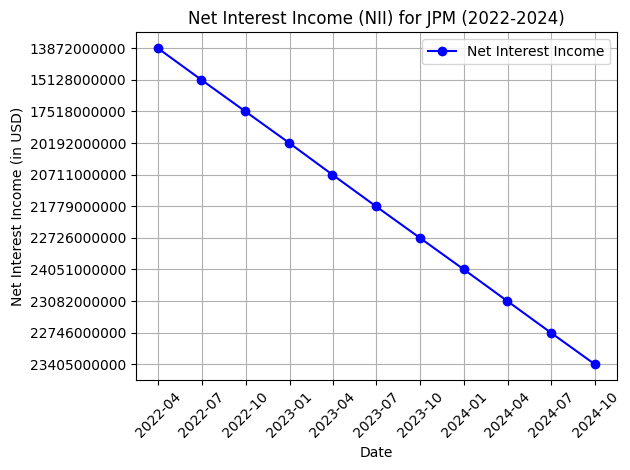

In [ ]:
#Plot NII - JPM 3 year period - most recent quarter is missing

plt.plot(nii_data['fiscalDateEnding'], nii_data['netInterestIncome'], marker='o', linestyle='-', color='b', label='Net Interest Income')

plt.xlabel('Date')
plt.ylabel('Net Interest Income (in USD)')
plt.title(f'Net Interest Income (NII) for {symbol} (2022-2024)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()